In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
data = pd.read_csv("housing.csv")

In [46]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [47]:
data.at[0,"population"]

np.float64(322.0)

In [48]:
data.dropna(inplace=True)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [50]:
from sklearn.model_selection import train_test_split

y = data["median_house_value"]
X = data.drop(["median_house_value"],axis=1)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [52]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>,
        <Axes: title={'center': 'NEAR BAY'}>],
       [<Axes: title={'center': 'NEAR OCEAN'}>,
        <Axes: title={'center': 'bedroom_ratio'}>,
        <Axes: title={'center': 'househld_rooms'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

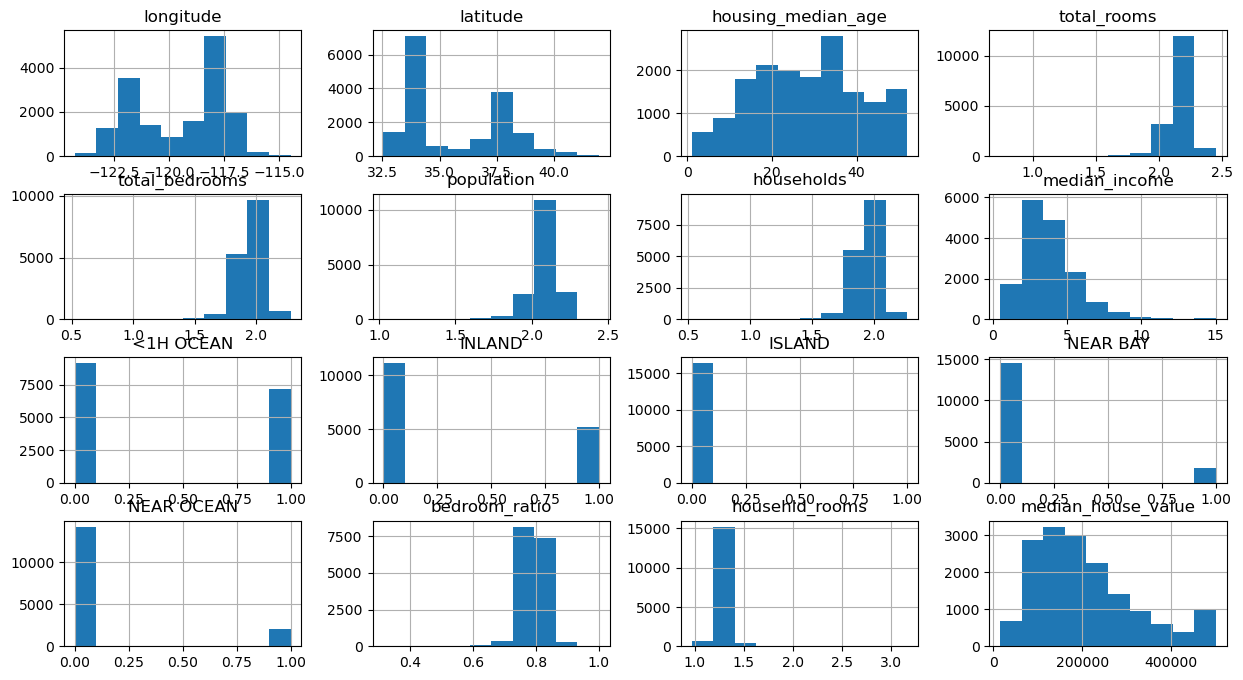

In [53]:
train_data.hist(figsize=(15,8))

In [54]:
train_data=X_train.join(y_train)

In [55]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
16607,-120.63,35.59,9.0,5782.0,1184.0,3026.0,1130.0,2.6528,<1H OCEAN,113500.0
17281,-119.73,34.42,23.0,1364.0,227.0,638.0,238.0,5.3279,NEAR OCEAN,413900.0
17808,-121.87,37.41,17.0,3719.0,588.0,2089.0,561.0,6.7867,<1H OCEAN,273700.0
14390,-117.23,32.74,35.0,2615.0,525.0,1312.0,547.0,4.1339,NEAR OCEAN,238200.0
13550,-117.30,34.11,42.0,525.0,111.0,444.0,120.0,2.6771,INLAND,67000.0
...,...,...,...,...,...,...,...,...,...,...
15951,-122.44,37.72,48.0,2675.0,585.0,1773.0,540.0,3.9565,NEAR BAY,268500.0
1843,-122.29,37.90,52.0,2657.0,500.0,1131.0,489.0,4.4286,NEAR BAY,234900.0
3855,-118.44,34.18,33.0,2127.0,414.0,1056.0,391.0,4.3750,<1H OCEAN,286100.0
1480,-122.05,37.96,35.0,2190.0,384.0,1154.0,401.0,3.8456,NEAR BAY,159800.0


In [56]:
if 'ocean_proximity' in train_data.columns:
    train_data =train_data.join(pd.get_dummies(train_data['ocean_proximity'],dtype=int))
    train_data=train_data.drop('ocean_proximity',axis=1)

    test_data =test_data.join(pd.get_dummies(test_data['ocean_proximity'],dtype=int))
    test_data=test_data.drop('ocean_proximity',axis=1)

<Axes: >

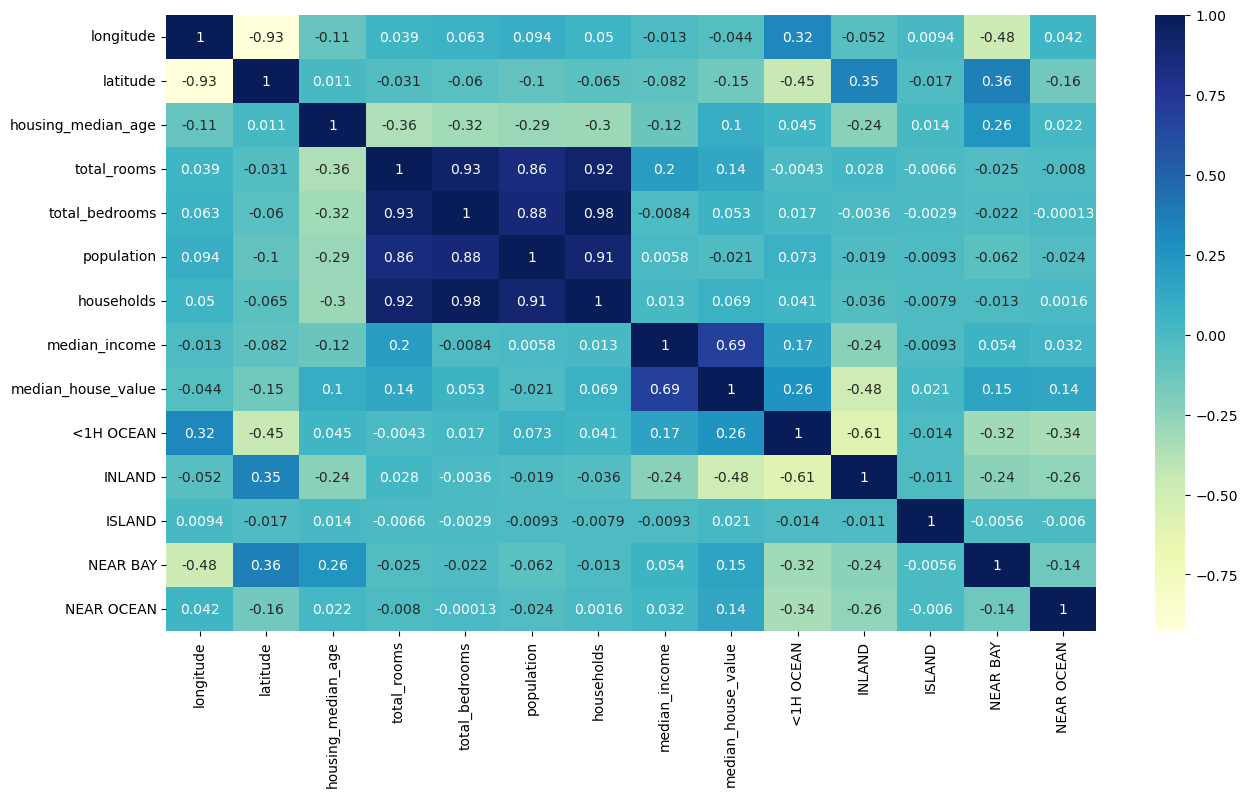

In [57]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

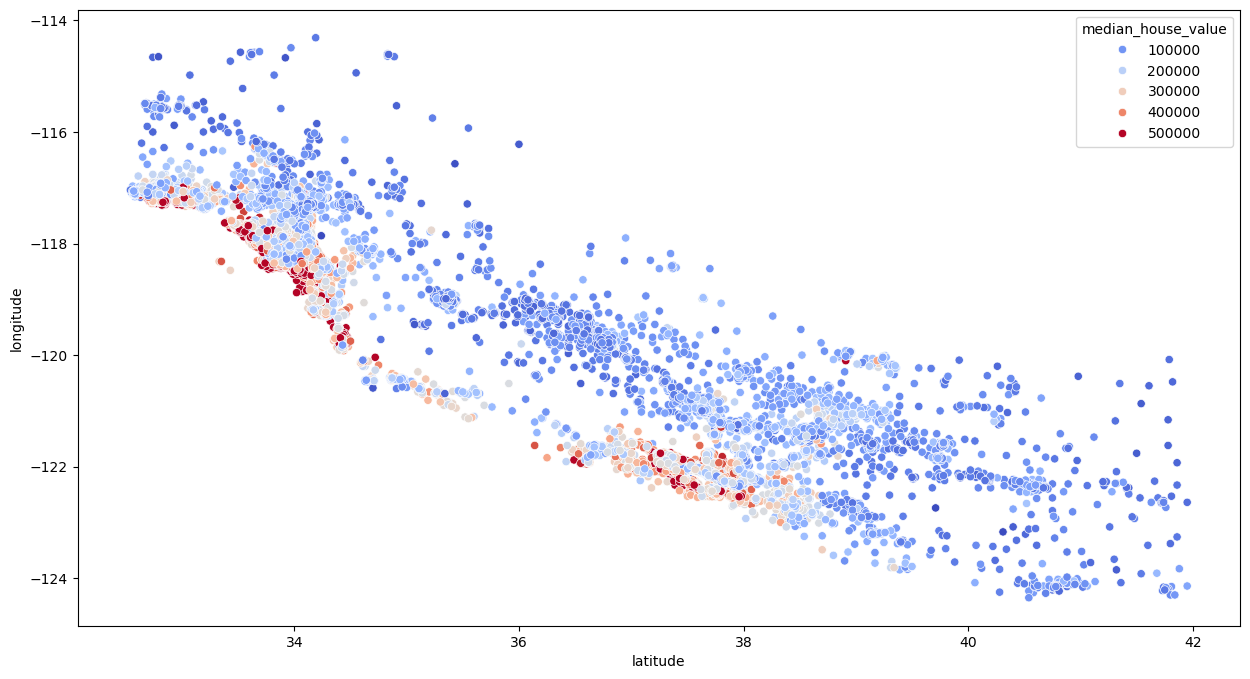

In [58]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude',y='longitude',data=train_data,hue='median_house_value',palette='coolwarm')

In [59]:
'median_house_value' in train_data.columns

True

In [60]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['househld_rooms']=train_data['total_rooms']/train_data['households']

<Axes: >

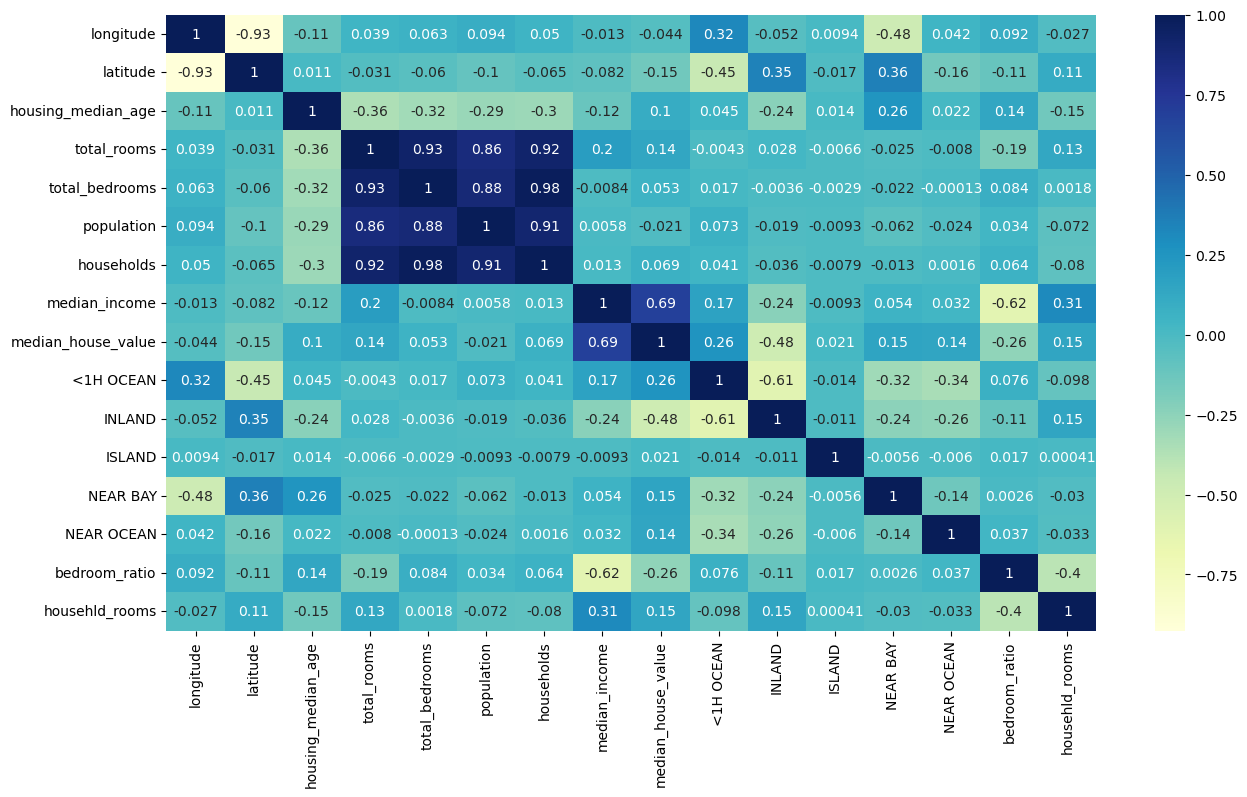

In [61]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap='YlGnBu')

In [62]:
from sklearn.linear_model import LinearRegression

X_train, y_train = train_data.drop(['median_house_value'],axis=1), train_data['median_house_value']

reg=LinearRegression()
reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [63]:
test_data=X_test.join(y_test)
test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

test_data["bedroom_ratio"]=test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms']/test_data['households']

In [73]:
X_test, y_test = test_data.drop(['median_house_value'],axis=1), test_data['median_house_value']
X_test=X_test.reindex(columns=X_train.columns, fill_value=0)

In [74]:
reg.score(X_test, y_t)

-1.533132772742122

In [75]:
from sklearn.ensemble import RandomForestRegressor

forest=RandomForestRegressor()

forest.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [77]:
forest.score(X_test,y_test)

0.015875122260423424